In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pytz
from skyfield import api, data
import satpred
import skychart

In [2]:
plt.rcParams['figure.figsize'] = [15, 15]

In [3]:
load = api.Loader('./data')

In [19]:
ts = load.timescale()
ephemeris = load('de421.bsp')
satellites = load.tle('http://celestrak.com/NORAD/elements/stations.txt', reload=True)
with load.open(data.hipparcos.URL) as f:
    df = data.hipparcos.load_dataframe(f)

[#################################] 100% stations.txt


In [20]:
sun = ephemeris['sun']
earth = ephemeris['earth']
iss = satellites['ISS']
manhattan_beach_ca_usa = api.Topos(latitude='33.881519 N', longitude='118.388177 W', elevation_m=33)
pacific = pytz.timezone('US/Pacific')
bright_stars = df[df['magnitude'] <= 5.]
more_stars = df[df['magnitude'] <= 7.]

In [6]:
d0 = datetime.datetime(2019, 6, 1, 0, 0)
t0 = ts.utc(pacific.localize(d0))
d1 = datetime.datetime(2019, 6, 11, 0, 0)
t1 = ts.utc(pacific.localize(d1))

In [7]:
df = satpred.SatelliteEphemeris(t0, t1, iss, manhattan_beach_ca_usa, earth, sun).to_dataframe()

In [8]:
columns = ['date', 'peak_magnitude', 'start', 'start_alt', 'start_az', 'start_d', 'culm', 'culm_alt', 
         'culm_az', 'culm_d', 'end', 'end_alt', 'end_az', 'end_d']

In [9]:
df[columns]

,date,peak_magnitude,start,start_alt,start_az,start_d,culm,culm_alt,culm_az,culm_d,end,end_alt,end_az,end_d
0,2019-06-01,0.2,22:51:35,10,NW,1498,22:53:03,23,NW,924,22:53:03,23,NW,922
1,2019-06-02,-2.1,22:02:18,10,NNW,1497,22:05:22,34,NE,706,22:05:22,34,NE,706
2,2019-06-03,-1.7,21:13:12,10,NNW,1496,21:15:48,20,NNE,1014,21:17:43,13,ENE,1299
3,2019-06-03,0.0,22:49:27,10,WNW,1496,22:50:33,18,WNW,1103,22:50:33,18,WNW,1101
4,2019-06-04,-3.4,21:59:47,10,NW,1495,22:02:58,71,WSW,441,22:02:58,71,WSW,441
5,2019-06-05,-3.4,21:10:22,10,NW,1494,21:13:39,54,NE,511,21:15:26,24,ESE,914
6,2019-06-06,-1.6,21:58:01,10,WNW,1493,22:00:38,21,SW,983,22:00:48,21,SW,986
7,2019-06-07,-2.9,21:08:05,10,WNW,1492,21:11:17,42,SW,600,21:13:24,18,SSE,1087
8,2019-06-09,-0.9,21:07:00,10,W,1490,21:08:42,13,SW,1297,21:10:25,10,SSW,1488


In [10]:
satephem = satpred.SatelliteEphemeris(t0, t1, iss, manhattan_beach_ca_usa, earth, sun, visible=False)
df = satephem.to_dataframe()

In [11]:
columns = ['date', 'start', 'start_alt', 'start_az', 'start_d', 'culm', 'culm_alt', 
         'culm_az', 'culm_d', 'end', 'end_alt', 'end_az', 'end_d', 'pass_type']

In [12]:
df[columns]

,date,start,start_alt,start_az,start_d,culm,culm_alt,culm_az,culm_d,end,end_alt,end_az,end_d,pass_type
0,2019-06-01,14:44:00,10,S,1467,14:46:50,27,SE,823,14:49:42,10,ENE,1479,daylight
1,2019-06-01,16:20:43,10,W,1475,16:23:28,23,NW,910,16:26:14,10,NNE,1485,daylight
2,2019-06-01,22:51:35,10,NW,1498,22:54:55,66,NE,455,22:58:16,10,SE,1495,visible
3,2019-06-02,13:55:44,10,SSE,1467,13:57:32,14,SE,1255,13:59:20,10,E,1474,daylight
4,2019-06-02,15:30:45,10,WSW,1472,15:33:54,41,NW,605,15:37:05,10,NNE,1483,daylight
5,2019-06-02,22:02:18,10,NNW,1497,22:05:24,34,NE,706,22:08:31,10,ESE,1495,visible
6,2019-06-02,23:39:32,10,W,1496,23:41:52,18,SW,1111,23:44:13,10,S,1492,eclipsed
7,2019-06-03,14:41:06,10,SW,1469,14:44:24,84,NW,413,14:47:44,10,NE,1481,daylight
8,2019-06-03,16:20:25,10,NW,1481,16:21:31,11,NNW,1408,16:22:37,10,N,1484,daylight
9,2019-06-03,21:13:12,10,NNW,1496,21:15:48,20,NNE,1014,21:18:24,10,E,1495,visible


In [13]:
df[df['pass_type'] == 'visible'][columns]

,date,start,start_alt,start_az,start_d,culm,culm_alt,culm_az,culm_d,end,end_alt,end_az,end_d,pass_type
2,2019-06-01,22:51:35,10,NW,1498,22:54:55,66,NE,455,22:58:16,10,SE,1495,visible
5,2019-06-02,22:02:18,10,NNW,1497,22:05:24,34,NE,706,22:08:31,10,ESE,1495,visible
9,2019-06-03,21:13:12,10,NNW,1496,21:15:48,20,NNE,1014,21:18:24,10,E,1495,visible
10,2019-06-03,22:49:27,10,WNW,1496,22:52:32,34,SW,701,22:55:37,10,SSE,1492,visible
14,2019-06-04,21:59:47,10,NW,1495,22:03:08,73,SW,435,22:06:28,10,SE,1492,visible
17,2019-06-05,21:10:22,10,NW,1494,21:13:39,54,NE,511,21:16:57,10,ESE,1492,visible
22,2019-06-06,21:58:01,10,WNW,1493,22:00:38,21,SW,983,22:03:16,10,S,1490,visible
26,2019-06-07,21:08:05,10,WNW,1492,21:11:17,42,SW,600,21:14:28,10,SSE,1489,visible
34,2019-06-09,21:07:00,10,W,1490,21:08:42,13,SW,1297,21:10:25,10,SSW,1488,visible


In [14]:
above_alt_40 = df['culm_alt'] > 40. 
visible = df['pass_type'] == 'visible'
df[visible & above_alt_40][columns]

,date,start,start_alt,start_az,start_d,culm,culm_alt,culm_az,culm_d,end,end_alt,end_az,end_d,pass_type
2,2019-06-01,22:51:35,10,NW,1498,22:54:55,66,NE,455,22:58:16,10,SE,1495,visible
14,2019-06-04,21:59:47,10,NW,1495,22:03:08,73,SW,435,22:06:28,10,SE,1492,visible
17,2019-06-05,21:10:22,10,NW,1494,21:13:39,54,NE,511,21:16:57,10,ESE,1492,visible
26,2019-06-07,21:08:05,10,WNW,1492,21:11:17,42,SW,600,21:14:28,10,SSE,1489,visible


/Users/allenb/anaconda/envs/astro/lib/python3.7/site-packages/matplotlib/projections/polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


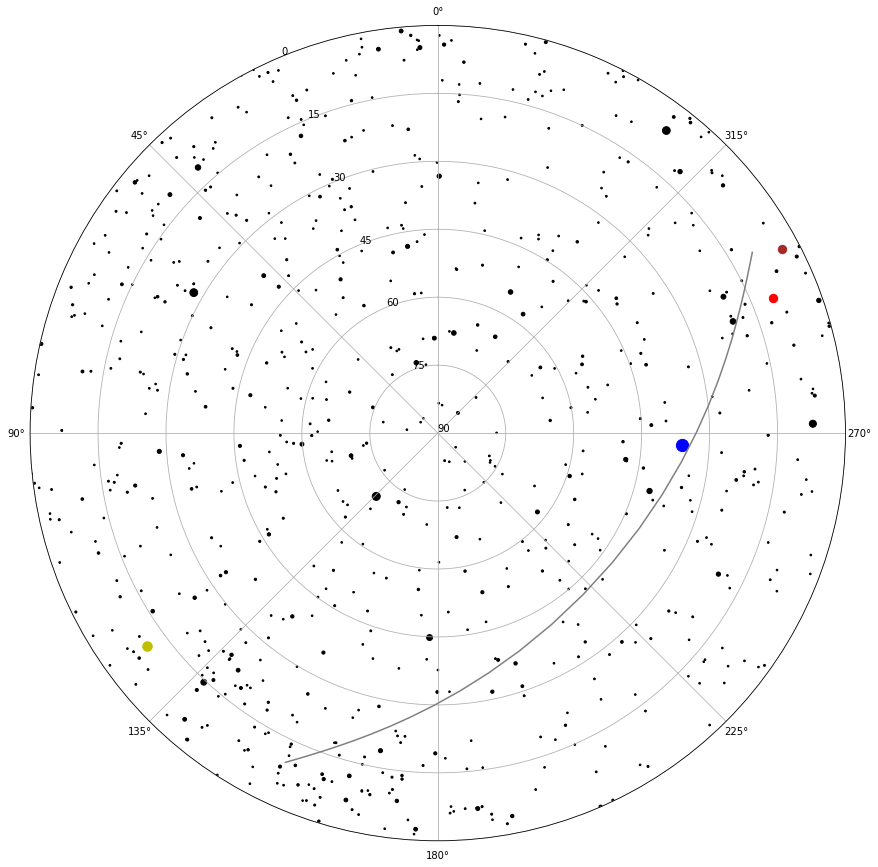

In [15]:
satellite_pass = satephem.passes[26]
chart = skychart.AltAzFullSkyChart(satellite_pass.topos + earth, satellite_pass.start_time)
chart.plot_stars(bright_stars)
chart.plot_ephemeris_object(ephemeris['sun'], 150, 'y')
chart.plot_ephemeris_object(ephemeris['moon'], 150, 'b')
chart.plot_ephemeris_object(ephemeris['mercury'], 70, 'brown')
chart.plot_ephemeris_object(ephemeris['venus'], 90, 'g')
chart.plot_ephemeris_object(ephemeris['mars'], 70, 'r')
chart.plot_ephemeris_object(ephemeris['JUPITER BARYCENTER'], 90, 'y')
chart.plot_ephemeris_object(ephemeris['SATURN BARYCENTER'], 80, 'y')
chart.plot_satellite_pass(satellite_pass)
chart.display()

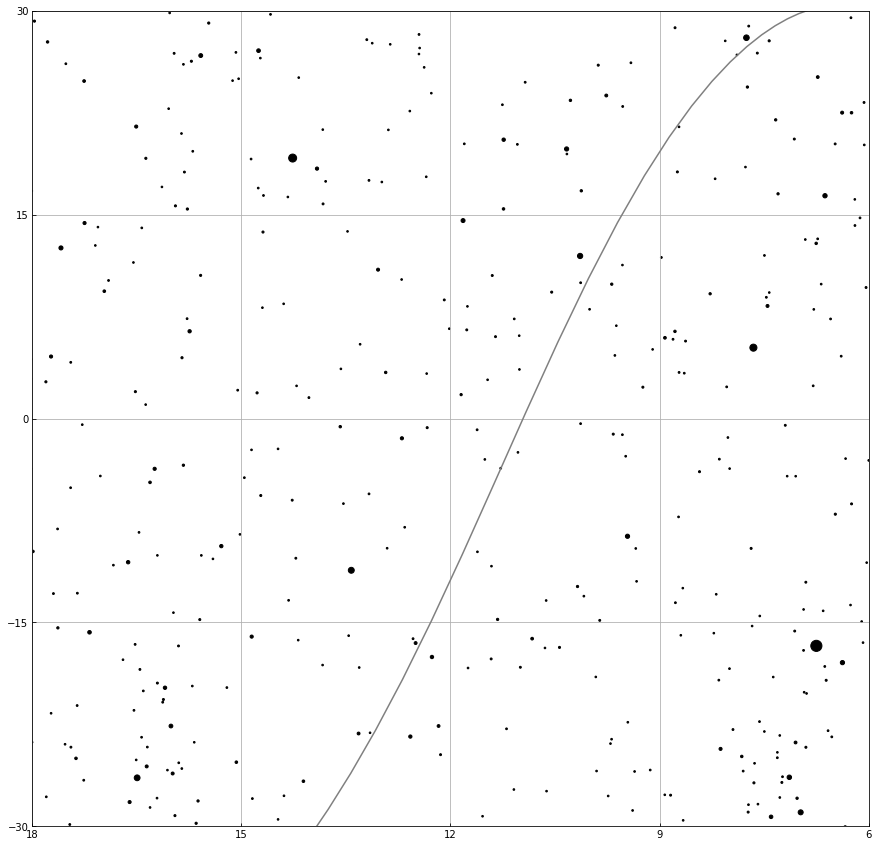

In [31]:
chart = skychart.RADecSkyChart(satellite_pass.topos + earth, satellite_pass.start_time, (18.0, 6.0), (-30, 30))
chart.plot_stars(bright_stars)
chart.plot_satellite_pass(satellite_pass)
chart.display()